# Terry Traffic Stops Project

# 1. Importing data and packages

We first import all the data and packages needed 

In [463]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve, auc, f1_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import preprocessing
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.compose import ColumnTransformer

from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline

In [464]:
# Import data
df = pd.read_csv('Terry_stops.csv')
pd.set_option('display.max_columns',None)

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


The data was sourced from Seattle Police Department 

### Stakeholder Requirement and Problem

Our stakeholder is the Supreme Court of Ohio. This is to help them understand if the Terry V. Ohio case was ruled accordingly and to ensure that such cases presented to them do not violed the Fourth Amendment that states; 

The right of the people to be secure in their persons, houses, papers, and effects, against unreasonable searches and seizures, shall not be violated, and no warrants shall issue, but upon probable cause, supported by oath or affirmation, and particularly describing the place to be searched, and the persons or things to be seized.

The inspiration to conduct this project was stemed from the event that caused Terry and his three friends to face 3 years imprisonment due to unreasonable searches and seizures and above all the need to protect the officer's safety incident to the investigation by the state.

# 2. Exloratory data Analysis

This process involves pre-processing of the data imported

In [470]:
# Look at the data
df.head(10)


,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Initial Call Type,Final Call Type,Call Type,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,-,-,-,N,N,South,O,O2
1,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,-,-,2015-04-01T00:00:00,04:55:00,-,-,-,N,N,-,-,-
2,-,-1,20150000002451,46430,Field Contact,None,7591,1985,M,Hispanic or Latino,-,-,2015-05-25T00:00:00,01:06:00,-,-,-,N,N,-,-,-
3,-,-1,20150000002815,51725,Field Contact,None,7456,1979,M,White,-,-,2015-06-09T00:00:00,19:27:00,-,-,-,N,N,-,-,-
4,-,-1,20150000002815,51727,Field Contact,None,7456,1979,M,White,-,-,2015-06-09T00:00:00,19:32:00,-,-,-,N,N,-,-,-
5,-,-1,20150000002833,52168,Field Contact,None,5966,1969,M,White,American Indian or Alaska Native,Male,2015-06-11T00:00:00,01:25:00,-,-,-,N,N,-,-,-
6,-,-1,20150000002856,52559,Field Contact,None,7500,1984,M,Black or African American,Unknown,Unable to Determine,2015-06-12T00:00:00,04:44:00,-,-,-,N,N,-,-,-
7,-,-1,20150000002870,52057,Field Contact,None,7592,1983,M,White,Unknown,Unable to Determine,2015-06-12T00:00:00,14:32:00,-,-,-,N,N,-,-,-
8,-,-1,20150000003188,57803,Citation / Infraction,None,7582,1966,M,Hispanic or Latino,Unknown,Unable to Determine,2015-06-27T00:00:00,05:12:00,-,-,-,N,N,-,-,-
9,-,-1,20150000003315,59686,Field Contact,None,6417,1973,M,White,-,Male,2015-07-02T00:00:00,00:25:00,-,-,-,N,N,-,-,-


In [471]:
# Look for null values
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40380 entries, 0 to 40388
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         40380 non-null  object
 1   Subject ID                40380 non-null  int64 
 2   GO / SC Num               40380 non-null  int64 
 3   Terry Stop ID             40380 non-null  int64 
 4   Stop Resolution           40380 non-null  object
 5   Weapon Type               40380 non-null  object
 6   Officer ID                40380 non-null  object
 7   Officer YOB               40380 non-null  int64 
 8   Officer Gender            40380 non-null  object
 9   Officer Race              40380 non-null  object
 10  Subject Perceived Race    40380 non-null  object
 11  Subject Perceived Gender  40380 non-null  object
 12  Reported Date             40380 non-null  object
 13  Reported Time             40380 non-null  object
 14  Initial Call Type     

In [472]:
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

In [476]:
# Drop duplicates
df = df.drop_duplicates(subset=['Terry Stop ID'], keep='first')

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40380 entries, 0 to 40388
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         40380 non-null  object
 1   Subject ID                40380 non-null  int64 
 2   GO / SC Num               40380 non-null  int64 
 3   Terry Stop ID             40380 non-null  int64 
 4   Stop Resolution           40380 non-null  object
 5   Weapon Type               40380 non-null  object
 6   Officer ID                40380 non-null  object
 7   Officer YOB               40380 non-null  int64 
 8   Officer Gender            40380 non-null  object
 9   Officer Race              40380 non-null  object
 10  Subject Perceived Race    40380 non-null  object
 11  Subject Perceived Gender  40380 non-null  object
 12  Reported Date             40380 non-null  object
 13  Reported Time             40380 non-null  object
 14  Initial Call Type     

In [478]:
df['Subject Age Group'].unique()

array(['-', '1 - 17', '56 and Above', '18 - 25', '26 - 35', '36 - 45',
       '46 - 55'], dtype=object)

In [479]:
df['Subject Age Group'].value_counts()

26 - 35         13386
18 - 25          8407
36 - 45          8372
46 - 55          5165
56 and Above     1929
1 - 17           1860
-                1261
Name: Subject Age Group, dtype: int64

In [480]:
df.isna().sum()

Subject Age Group           0
Subject ID                  0
GO / SC Num                 0
Terry Stop ID               0
Stop Resolution             0
Weapon Type                 0
Officer ID                  0
Officer YOB                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Reported Date               0
Reported Time               0
Initial Call Type           0
Final Call Type             0
Call Type                   0
Arrest Flag                 0
Frisk Flag                  0
Precinct                    0
Sector                      0
Beat                        0
dtype: int64

Our target variable will be the Stop Resolution column. This is becase we aim to see if an arrest was made after a Terry Stop.
This is a binary classification problem 1 = Arrest, 0 = No arrest. We will look at the content in the Stop Resolution Column and assign arrest to 1 and the rest as 0. 

In [481]:
# See unique values in Stop Resolution Column
df['Stop Resolution'].unique()

array(['Arrest', 'Field Contact', 'Citation / Infraction',
       'Offense Report', 'Referred for Prosecution'], dtype=object)

In [482]:
# Assign 1 to arrest and 0 to the rest
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
#df['Stop Resolution'].value_counts()

We first change the date column to a datetime formart and also separate the month, and year into separate columns to analyse each individually and get insights from them.

In [483]:
# Change the date column to datetime so we can work with it. Add in the month as a new column:
df['Reported Date'] = pd.to_datetime(df['Reported Date'])
df['Month'] = df['Reported Date'].dt.month.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July'
                                               ,8:'August',9:'September',10:'October',11:'November',12:'December'})
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year

In [484]:
df['Month']

0         October
1           April
2             May
3            June
4            June
           ...   
40384    December
40385    December
40386    December
40387     January
40388    February
Name: Month, Length: 40380, dtype: object

Drop all the columns that are uncessary and will not be used

In [485]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Arrest Flag',
       'Frisk Flag', 'Precinct', 'Sector', 'Beat', 'Month', 'Day', 'Year'],
      dtype='object')

In [486]:

df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Sector','Beat','Initial Call Type','Final Call Type','Day', 'Officer YOB'],axis=1, inplace=True)

df.head()

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year
0,-,92317,1,None,M,N,N,South,October,2015
1,-,32260,0,None,M,N,N,-,April,2015
2,-,46430,0,None,M,N,N,-,May,2015
3,-,51725,0,None,M,N,N,-,June,2015
4,-,51727,0,None,M,N,N,-,June,2015


In [487]:
# Dealing with the Weapon Type Column
df['Weapon Type'] = df['Weapon Type'].map({'Lethal Cutting Instrument': 'Non-Firearm', 
                                           'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
                                           'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
                                           'Blunt Object/Striking Implement': 'Non-Firearm',
                                           'Mace/Pepper Spray': 'Non-Firearm', 'Club':'Non-Firearm',
                                           'Taser/Stun Gun':'Non-Firearm', 'Blackjack':'Non-Firearm',
                                           'Brass Knuckles':'Non-Firearm', 'Fire/Incendiary Device':'Non-Firearm',
                                           'Handgun':'Firearm','Firearm Other':'Firearm',
                                           'Firearm (unk type)':'Firearm','Firearm':'Firearm',
                                           'Other Firearm':'Firearm', 'Rifle':'Firearm','Shotgun':'Firearm',
                                           'Automatic Handgun':'Firearm','None':'None','-':'None',
                                           'None/Not Applicable':'None'})
df['Weapon Type'].unique()

array(['None', 'Non-Firearm', 'Firearm'], dtype=object)

# 3. Data Visualisation

In this section we will conduct Exploratory Data Analysis, by using data visualisation.

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stop Resolution', ylabel='count'>

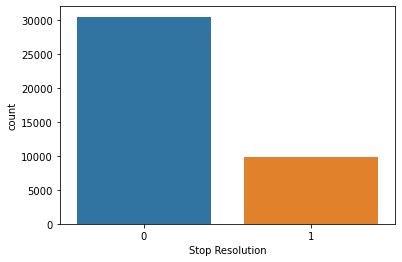

In [488]:
# Plot to see how many arrests were made
sns.countplot(df['Stop Resolution'])



In [489]:
# Dealing with subject Percieved gender

There were less arrests after the Stop

<AxesSubplot:xlabel='count', ylabel='Weapon Type'>

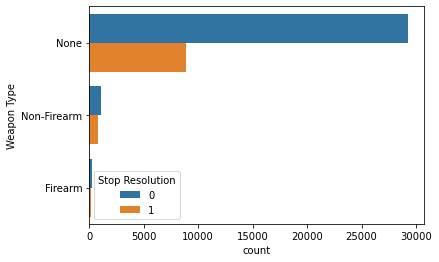

In [490]:
# PLot to see types of weapons the culprits had on them
sns.countplot(y = df['Weapon Type'], hue=df['Stop Resolution'])


There were more arrests of people without any weapon

In [491]:
# Plot to see ratio of male to female stopped
# sns.countplot(y=df['Subject Perceived Gender'], hue=df['Stop Resolution'])

It is more likely for men to be stopped as compared to ladies. There is also a higher chance of getting arrested if you are a man.

<AxesSubplot:xlabel='count', ylabel='Frisk Flag'>

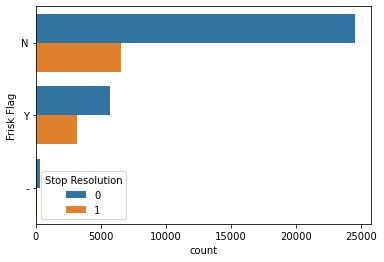

In [492]:
# Plot Frisk Flag vs Stop Resolution
sns.countplot(y=df['Frisk Flag'], hue=df['Stop Resolution'])

<AxesSubplot:xlabel='count', ylabel='Arrest Flag'>

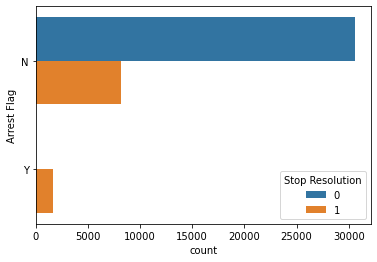

In [493]:
# Plot Arrest Flag vs Stop Resolution
sns.countplot(y=df['Arrest Flag'], hue=df['Stop Resolution'])

The is always going to be an arrest later after the Terry stop rather than immediately on the stop

<AxesSubplot:xlabel='count', ylabel='Year'>

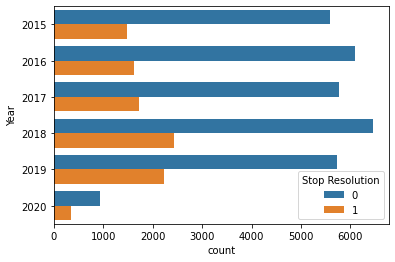

In [494]:
# Plot Year vs Stop Resolution
sns.countplot(y=df['Year'], hue=df['Stop Resolution'])

<AxesSubplot:xlabel='count', ylabel='Month'>

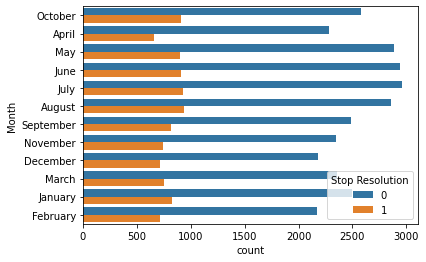

In [495]:
# Plot Month vs Stop Resolution
sns.countplot(y=df['Month'], hue=df['Stop Resolution'])

Let's make a pie chart representing ratio of arrested people

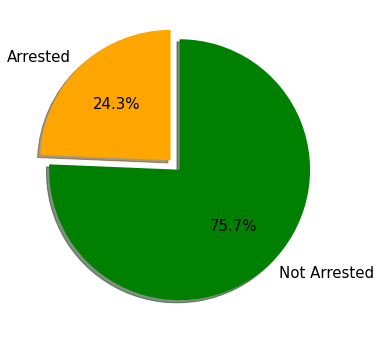

In [539]:
# Create chart labels and calculate the size of each piece of the pie:
labels = 'Arrested', 'Not Arrested'
sizes = [df['Stop Resolution'].sum(), (len(df['Stop Resolution'])-df['Stop Resolution'].sum())]
explode = (0.1, 0)  
fig1, ax1 = plt.subplots(figsize=(15,6))
ax1.pie(sizes, explode=explode, colors = ['orange','green'],labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 15})

plt.show();

# 4. Modeling

In this section, we will fit 3 models, a baseline model parametric (logistic Regression) , a non-parametric model (Random Forest) and (Decision Trees)

In [512]:
# Define X and Y 
X = df.drop(columns=['Stop Resolution'], axis=1)
y = df['Stop Resolution']

# Split into Train and Test Data

# We will use 70% of the data as train data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.3)

## Logistic Regression 

We will first use a baseline Model, in this case the Logistic Regression Model, to have a comparison point for the other models. 

In [515]:
# creating continuous and categorical lists of columns from df

X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes('object')
len(X_train_num.columns), len(X_train_cat.columns)

(3, 7)

In [529]:
# define a function that returns best parameters of the model, scores, and confusion matrix plot
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    
    print(f'best parameters: {model.best_params_}')
    print('')
    print(classification_report(y, y_pred))
    
    plot_confusion_matrix(model, X, y)

In [517]:
#creating the pipeline Innards

numerical_pipeline = Pipeline(steps=[
    ('ss', StandardScaler())])
                
categorical_pipeline = Pipeline(steps=[
    ('ohe', OneHotEncoder(drop='first',
                         sparse=False))])

trans = ColumnTransformer(transformers=[('numerical', numerical_pipeline, X_train_num.columns),
                                        ('categorical', categorical_pipeline, X_train_cat.columns),])

In [518]:
logreg_pipeline = Pipeline(steps=[('trans', trans),('sm',SMOTE()),('logreg', LogisticRegression())])

logreg_grid = {'logreg__C': [1, 10], 'logreg__penalty': ['l1', 'l2']}

In [519]:
logreg_gs = GridSearchCV(estimator=logreg_pipeline, param_grid=logreg_grid)

logreg_gs.fit(X_train, y_train)

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\imblearn\pipeline.py", line 281, in fit
    self._final_estimator.fit(Xt, yt, **fit_params)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
Va

C:\Users\Sophi\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['index', 'Terry Stop ID', 'Year'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Subject Age Group',

In [520]:
print("\nFinite? ", np.isfinite(np.inf))
print("\nFinite? ", np.isfinite(np.NINF))


Finite?  False

Finite?  False


In [ ]:
logreg_model_train_score = evaluate_model(logreg_gs, X_train, y_train)

In [392]:
np.isfinite(1)

True

In [508]:
# Checking for float
print("\nFinite? ", np.isfinite(14.))
print("\nFinite? ", np.isfinite(3.6))


Finite?  True

Finite?  True


## Decision Trees

In [535]:
dt_pipeline = Pipeline(steps=[('trans', trans),('sm',SMOTE()),('dt', DecisionTreeClassifier())])
dt_grid = {'dt__criterion': ['gini', 'entropy'],'dt__splitter': ['best', 'random']}
dt_gs = GridSearchCV(estimator=dt_pipeline, param_grid=dt_grid)
dt_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['index', 'Terry Stop ID', 'Year'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Subject Age Group',

best parameters: {'dt__criterion': 'gini', 'dt__splitter': 'random'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21372
           1       1.00      1.00      1.00      6894

    accuracy                           1.00     28266
   macro avg       1.00      1.00      1.00     28266
weighted avg       1.00      1.00      1.00     28266



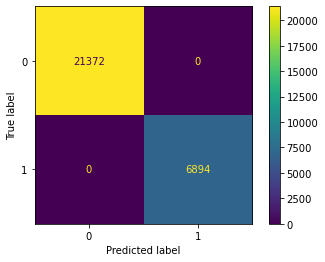

In [536]:
dt_model_train_score = evaluate_model(dt_gs, X_train, y_train)

best parameters: {'dt__criterion': 'gini', 'dt__splitter': 'random'}

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      9179
           1       0.48      0.53      0.51      2935

    accuracy                           0.75     12114
   macro avg       0.66      0.67      0.67     12114
weighted avg       0.76      0.75      0.75     12114



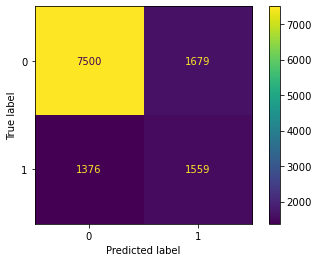

In [537]:
dt_model_test_score = evaluate_model(dt_gs, X_test, y_test)

This model has better precision, recall, and f1 scores on the train set but not the test set. This means that it has high Variance and is overfitted

## Random Forest

In [521]:
rf_pipeline = Pipeline(steps=[('trans', trans),('sm',SMOTE()),('rf', RandomForestClassifier())])


rf_grid = {'rf__max_depth': [5, 7], 'rf__min_samples_split': [3, 7], 'rf__min_samples_leaf': [1, 3]}

In [523]:
rf_gs = GridSearchCV(estimator = rf_pipeline, param_grid = rf_grid)

rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         Index(['index', 'Terry Stop ID', 'Year'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         Index(['Subject Age Group',

best parameters: {'rf__max_depth': 7, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.88      0.73      0.80     21372
           1       0.45      0.69      0.54      6894

    accuracy                           0.72     28266
   macro avg       0.66      0.71      0.67     28266
weighted avg       0.77      0.72      0.73     28266



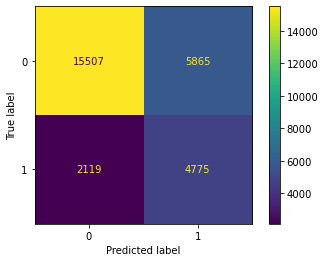

In [524]:
rf_train_score = evaluate_model(rf_gs, X_train, y_train)

best parameters: {'rf__max_depth': 7, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      9179
           1       0.45      0.68      0.54      2935

    accuracy                           0.72     12114
   macro avg       0.66      0.70      0.67     12114
weighted avg       0.77      0.72      0.73     12114



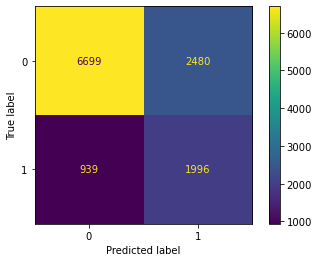

In [525]:
rf_test_score = evaluate_model(rf_gs, X_test, y_test)

# Final Model

The Best Model is the Random Forest model, that has been pruned. The performance matrices were better compared to the logistic regression and Decision Tree. This is on the test data, which is the data we aim to get higher matrices on.

In [527]:
finalModel = rf_gs.best_estimator_
finalModel

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  Index(['index', 'Terry Stop ID', 'Year'], dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  Index(['Subject Age Group', 'Weapon Type', 'Officer Gender', 'Arrest Flag',
       'Frisk Flag', 'Precinct', 'Month'],
      dtype='object'))])),
                ('sm', SMOTE()),
                ('rf',
                 RandomForestClassifier(max_depth=7, mi

best parameters: {'rf__max_depth': 7, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.88      0.73      0.80     21372
           1       0.45      0.69      0.54      6894

    accuracy                           0.72     28266
   macro avg       0.66      0.71      0.67     28266
weighted avg       0.77      0.72      0.73     28266



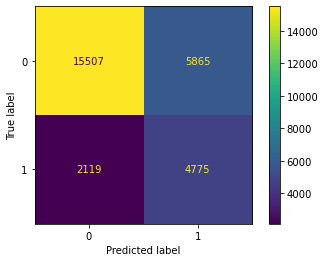

In [528]:
evaluate_model(rf_gs, X_train, y_train)

best parameters: {'rf__max_depth': 7, 'rf__min_samples_leaf': 3, 'rf__min_samples_split': 3}

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      9179
           1       0.45      0.68      0.54      2935

    accuracy                           0.72     12114
   macro avg       0.66      0.70      0.67     12114
weighted avg       0.77      0.72      0.73     12114



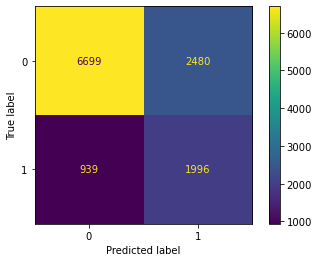

In [530]:
evaluate_model(rf_gs, X_test, y_test)

# 5.  Conclusion


With the 4 matrices, we would prefer using a Random Forest Model as it has better performance matrix on test data while Decision Trees Model has better performance metrix on train data which shows high Variance
Therefore, when using the Random Forest model, we can accurately determine whether or not a Terry Stop ended in an arrest 72% of the time. The most influential features when using the Random Forest model are related to the precinct and if there was an arrest flag. 
The top 5 features are: 
    1. Arrest Flag 
    2. Missing precint 
    3. West Precinct 
    5. Frisk Flag given

Recommendations:

Train officers on when is an appropriate time to arrest someone during the terry stop vs. when it is appropriate to wait until later as this is another key indicator of arrests.
Try to capture the officer's precinct for all terry stops to have a better opportunity to predict if an arrest will occur.
Train officers on when is an appropriate time to 'frisk' someone as this is another key indicator of arrests.
Next Steps:

While 72% is decently accurate, there still is room for improvement. Moving forward, I would like to look into further tuning our model, either through cleaning up the data more or through adjusting the model inputs. Additionally, looking into other types of classification models, specifically deep learning models, could also help generate a more accurate model.

